In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
data = pd.read_excel('C:/Users/Wazir/Downloads/Chart_View.xls', index_col=0, parse_date = True, sheet_name =1)

In [134]:
data = data.dropna()
data.sort_index(inplace = True)
data = data.reindex(sorted(data.columns), axis=1)


In [135]:
data.shape

(1289, 20)

In [136]:
index = []
for i in range(0, 20, 2):
    index.append((i, i+1))

In [137]:
df = pd.DataFrame()
for column in data.columns:
    data[column + ' Mean'] = data[column].rolling(window = 260).mean()
    data[column + ' Std'] = data[column].rolling(window = 260).std()
    df[column + ' Norm'] = (data[column] - data[column + ' Mean'])/data[column + ' Std']

for idx in index:
    df[df.columns[idx[0]] +' Net'] = df[df.columns[idx[0]]] - df[df.columns[idx[1]]]
    
data.sort_index(inplace = True)

df = df.dropna()
df = df.iloc[:, -10:]

for column in df.columns:
    df[column + ' Sum'] = df[column].rolling(window=20).sum()
    
df = df.iloc[:, -10:]
df.dropna(inplace = True)

rank = df.tail(1)
rank.columns = ['AUD', 'CAD', 'CHF', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK', 'USD']
rank.T.sort_values(by= rank.T.columns[0], ascending=False)

Date,2021-02-09 00:00:00
NOK,15.292280
SEK,10.121437
CHF,6.291043
USD,6.063982
CAD,5.280990
AUD,4.836279
JPY,-1.914447
EUR,-4.189691
NZD,-9.992741
GBP,-10.420561


In [143]:
data = pd.read_excel('C:/Users/Wazir/Downloads/Chart_View (2).xls', index_col=0, parse_date = True, sheet_name =1)

In [144]:
data.head()

,Economic Data Change Index CEDI in EUR,Economic Data Change Index CEDI in GBP,Economic Data Change Index CEDI in AUD,Economic Data Change Index CEDI in USD,Economic Data Change Index CEDI in NOK,Economic Data Change Index CEDI in SEK,Economic Data Change Index CEDI in CHF,Economic Data Change Index CEDI in GBP.1,Economic Data Change Index CEDI in CAD,Economic Data Change Index CEDI in JPY
Date,,,,,,,,,,
2021-02-10 00:00:00,947.8,1326.7,345.1,1318.4,59.2,598.4,198.9,1326.7,223.7,717.2
2021-02-09 00:00:00,961.3,1336.3,350.8,1341.6,92.1,606.5,199.9,1336.3,227.9,742.8
2021-02-08 00:00:00,974.0,1592.0,356.1,1360.0,109.3,613.5,201.0,1592.0,231.8,767.5
2021-02-05 00:00:00,1014.8,1942.0,370.3,1404.6,145.1,633.6,204.1,1942.0,241.9,786.5
2021-02-04 00:00:00,1031.7,2014.5,453.5,1413.7,155.4,641.3,205.1,2014.5,259.4,793.9


In [145]:
data = data.dropna()
data.sort_index(inplace = True)
data = data.reindex(sorted(data.columns), axis=1)

In [148]:
data.drop('Economic Data Change Index CEDI in GBP.1', axis=1, inplace=True)

In [153]:
usd = data.iloc[:, -1:]
others = data.iloc[:, :-1]

In [155]:
weights = [0.034, 0.017, 0.017, 0.508, 0.102, 0.22, 0.017, 0.017]
others.columns

Index(['Economic Data Change Index CEDI in AUD',
       'Economic Data Change Index CEDI in CAD',
       'Economic Data Change Index CEDI in CHF',
       'Economic Data Change Index CEDI in EUR',
       'Economic Data Change Index CEDI in GBP',
       'Economic Data Change Index CEDI in JPY',
       'Economic Data Change Index CEDI in NOK',
       'Economic Data Change Index CEDI in SEK'],
      dtype='object')

In [156]:
weighteddf = pd.DataFrame()
for i in range(len(others.columns)):
    weighteddf[others.columns[i]] = others[others.columns[i]] * weights[i]
    

In [171]:
basket = pd.DataFrame(weighteddf.sum(axis=1))
basket['USD'] = usd
basket.columns = ['Basket', 'USD']
basket['Long/Short'] = np.where(basket['USD'] > basket['Basket'], 1, -1)

C:\Users\Wazir\Anaconda3\envs\$PYTHON3.6\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


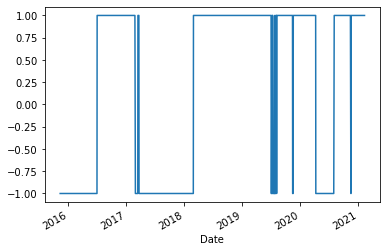

In [173]:
basket['Long/Short'].plot()

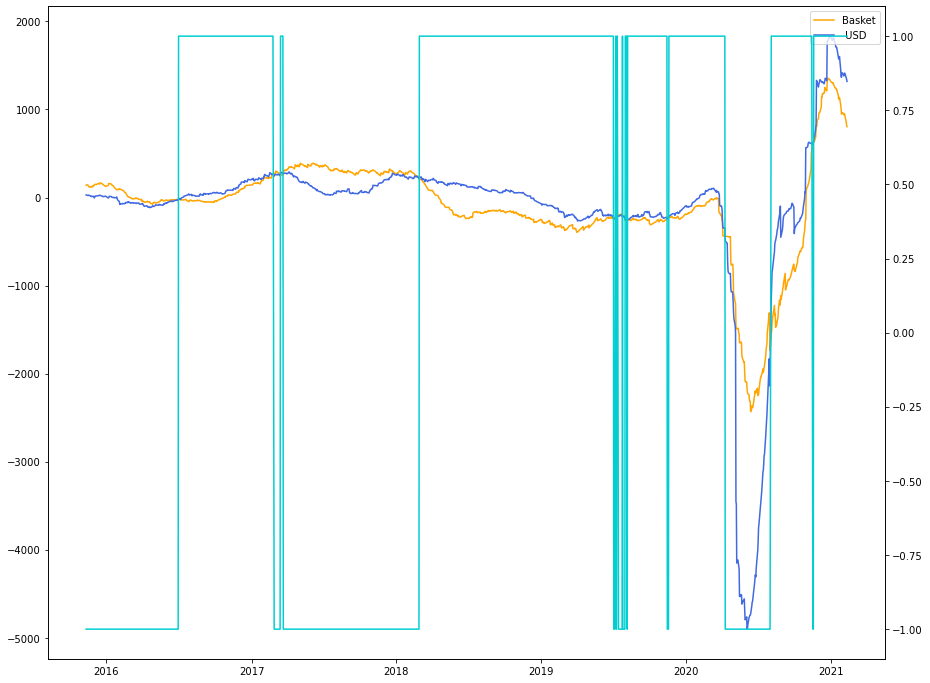

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(15,12))

ax.plot(basket['Basket'], label='Basket', color='orange')
ax.plot(basket['USD'], label =' USD', color = 'royalblue')
ax.legend(loc='upper right')
axt = ax.twinx()
axt.plot(basket['Long/Short'], color = 'darkturquoise', label = 'Long/Short')